## Overview

* Construct a Story using visualizations consisting of at least 5 different plots
* Choose a different visualizations types for each of the 5 plots.Implement the concepts covered in the chapters: sorting, filtering, different aggregations, etc.
* Save the file in the python-bi-project in Github, and data should be saved to a folder named data.
* Include a README.md file that describes the steps & thought process 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel('../data/HotelSpendData 2.xlsx')

In [3]:
hotels.head()

,Hotel_ID,Hotel_Name,Hotel_Address,City,State,CountryName,PostalCode,City_State_Country,Hotel_Chain,Hotel_World_Area,Preferred_NonPreferred,Client_Preferred_Room_Price,Annual_Hotel_Spend,Annual_Roomnights,Average_Booked_Rate,Unnamed: 15,Hotel_Latitude,Hotel_Longitude,CityLatitude,CityLongitude
0,2026557,Ac Ponferrada,"Avenida Astorga, 2",Ponferrada,NaN,Spain,24400,"Ponferrada, Spain",Marriott,Europe,Preferred,78.80,0.00,0,0.0,NaN,42.549486,-6.583102,42.548328,-6.598340
1,2026761,Al Ain Rotana,Sheikh Zayed Road,Al Ain,NaN,United Arab Emirates,1210,"Al Ain, United Arab Emirates",Rotana Hotels & Resorts,Middle East,Preferred,137.91,0.00,0,0.0,NaN,24.205990,55.682961,24.205990,55.682961
2,2027431,Ramada Plaza Jumerirah Beach,"Bahar 7, Jumeirah Beach Residence, Marsa",Dubai,NaN,United Arab Emirates,86834,"Dubai, United Arab Emirates",Wyndham Hotel Group,Middle East,Non-preferred,0.00,3989.75,0,0.0,NaN,25.077222,55.134869,25.259050,55.295750
3,2027482,Angelo Hotel Prague,Radlicka 1G/3216,Prague,NaN,Czech Republic,150 00,"Prague, Czech Republic",Vienna International,Europe,Preferred,115.54,0.00,0,0.0,NaN,50.070583,14.401467,50.079151,14.432990
4,2027499,Antares Hotel Concorde,Viale Monza 132,Milan,NaN,Italy,20127,"Milan, Italy",Worldhotels,Europe,Non-preferred,0.00,370.24,0,0.0,NaN,45.502468,9.221699,45.468929,9.181000


### World map

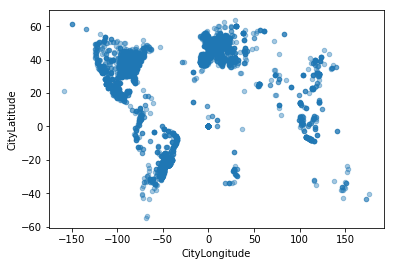

In [4]:
hotels.plot(kind='scatter', x='CityLongitude', y='CityLatitude', alpha=0.4)

In [5]:
BBox = ((hotels.CityLongitude.min(), hotels.CityLongitude.max(), hotels.CityLatitude.min(), hotels.CityLatitude.max()))
BBox

(-157.855545, 175.616592, -54.799999, 63.553471)

In [6]:
map_= plt.imread('../world2.png')

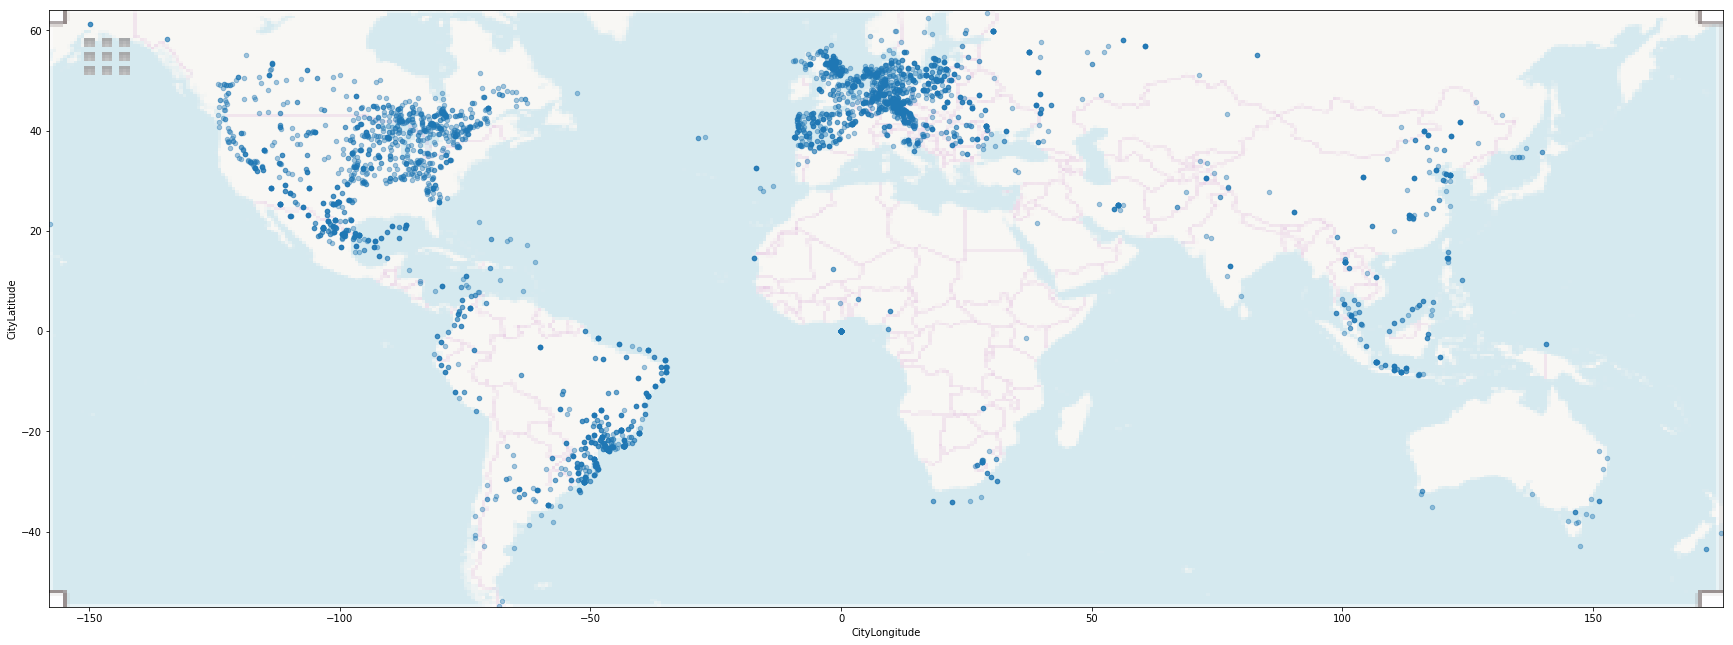

In [7]:
hotels.plot(kind='scatter', x='CityLongitude', y='CityLatitude', alpha=0.4, 
            figsize=(30, 33), cmap=plt.get_cmap('jet'), colorbar=False)

plt.imshow(map_, extent=[-158, 176, -55, 64], alpha=0.5)
plt.show()

### Hotel count per world region

([<matplotlib.patches.Wedge at 0x113f5a550>,
 [Text(1.0988659016135354, 0.04993726335185302, 'Africa'),
  Text(1.034620691696999, 0.37357733377765734, 'Asia'),
  Text(-0.44407371692560726, 1.0063789216472472, 'Europe'),
  Text(-0.537110217197447, -0.9599544856825826, 'Latin America'),
  Text(0.3664886012575885, -1.037152884172944, 'Middle East'),
  Text(0.8943222859650874, -0.6404589360967498, 'North America'),
  Text(1.099877398733769, -0.01642278157432256, 'Southwest Pacific')],
 [Text(0.59938140088011, 0.02723850728282892, '1.4%'),
  Text(0.564338559107454, 0.20376945478781308, '8.1%'),
  Text(-0.24222202741396756, 0.5489339572621347, '44.1%'),
  Text(-0.29296920938042564, -0.523611537645045, '26.5%'),
  Text(0.19990287341323004, -0.565719755003424, '0.6%'),
  Text(0.48781215598095673, -0.34934123787095434, '18.8%'),
  Text(0.5999331265820558, -0.008957880858721394, '0.5%')])

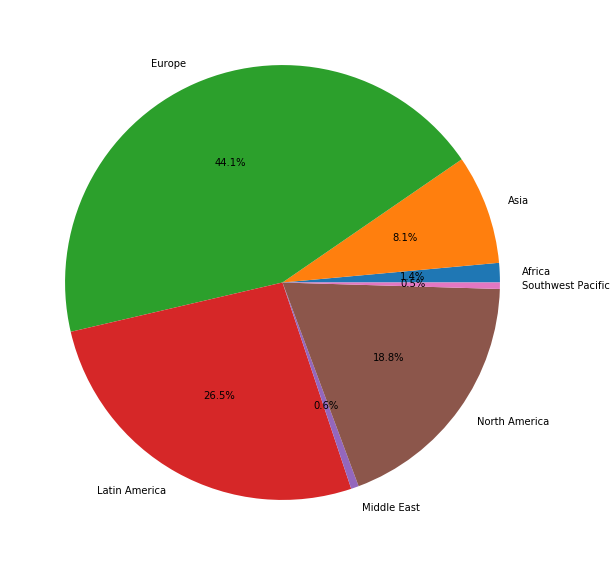

In [8]:
hotels_region = hotels.groupby('Hotel_World_Area')['Hotel_ID'].count()
hotels_region.index

plt.figure(figsize=(15,10))
plt.pie(hotels_region, labels=hotels_region.index, autopct='%1.1f%%')

### Preferred vs non-preferred hotels per world region

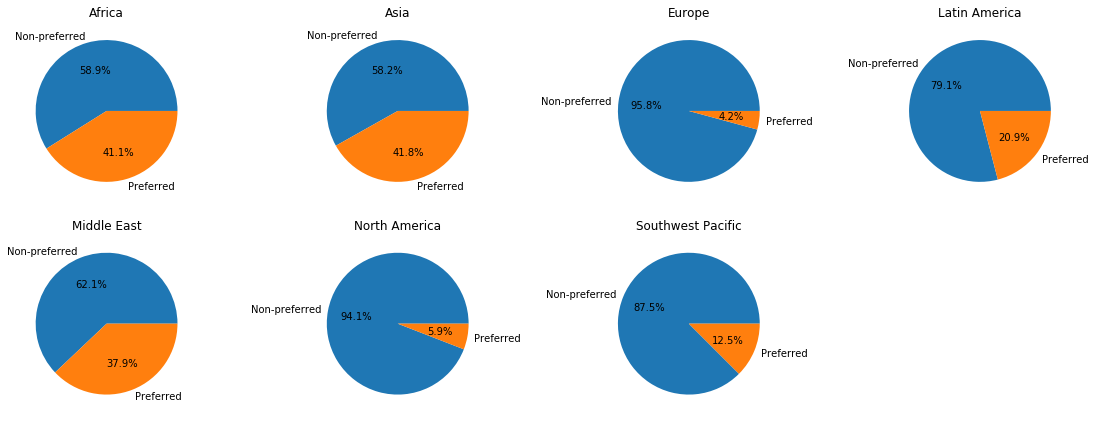

In [9]:
hotels_region_pref = hotels.groupby(['Hotel_World_Area', 'Preferred_NonPreferred'])['Hotel_ID'].count().reset_index()
world_area = list(hotels_region_pref.Hotel_World_Area.unique())

fig = plt.figure(figsize=(20,15))

for area, num in zip(world_area, range(1,len(world_area)+1)):
    df = hotels_region_pref[hotels_region_pref.Hotel_World_Area == area][['Preferred_NonPreferred', 'Hotel_ID']]
    ax = fig.add_subplot(4,4,num)
    ax.pie(df.Hotel_ID, labels=df.Preferred_NonPreferred, autopct='%1.1f%%')
    ax.set_title(area)
plt.show()

### Spend & roomnights per region

In [10]:
hotels.groupby('Hotel_World_Area')['Annual_Hotel_Spend'].sum().sort_values(ascending=False).reset_index()

,Hotel_World_Area,Annual_Hotel_Spend
0,Latin America,5229020.36
1,Europe,3447234.09
2,North America,2000429.64
3,Asia,377955.64
4,Africa,322347.61
5,Middle East,63266.45
6,Southwest Pacific,28471.68


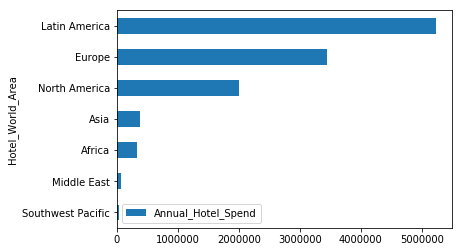

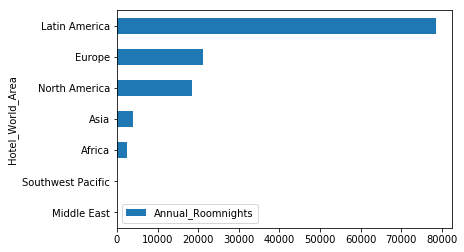

In [11]:
hotels_region_spend = hotels.groupby('Hotel_World_Area')['Annual_Hotel_Spend'].sum().sort_values().reset_index()
hotels_region_spend.plot.barh(x='Hotel_World_Area')
hotels_region_nights = hotels.groupby('Hotel_World_Area')['Annual_Roomnights'].sum().sort_values().reset_index()
hotels_region_nights.plot.barh(x='Hotel_World_Area')

plt.show()

### Average Booked Rate vs Roomnights

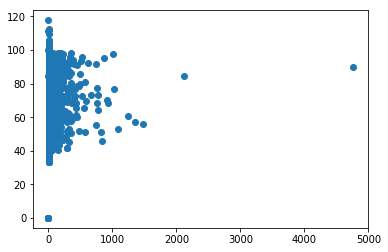

In [12]:
plt.scatter(hotels.Annual_Roomnights, hotels.Average_Booked_Rate)

In [13]:
hotels[hotels.Annual_Roomnights >2000]

,Hotel_ID,Hotel_Name,Hotel_Address,City,State,CountryName,PostalCode,City_State_Country,Hotel_Chain,Hotel_World_Area,Preferred_NonPreferred,Client_Preferred_Room_Price,Annual_Hotel_Spend,Annual_Roomnights,Average_Booked_Rate,Unnamed: 15,Hotel_Latitude,Hotel_Longitude,CityLatitude,CityLongitude
3992,2089319,Lagoa Serena Hotel,Rua Bolivia 76,Araras,NaN,Brazil,13601-003,"Araras, Brazil",No Chain,Latin America,Preferred,85.71,178790.42,2112,84.65,NaN,-22.361986,-47.380720,-22.357386,-47.384534
4331,2063961,Novotel Sao Paulo Morumbi,R Ministro Nelson Hungria 577,Sao Paulo,NaN,Brazil,5690050,"Sao Paulo, Brazil",Accor Hotels,Latin America,Preferred,95.72,428894.58,4757,90.16,NaN,-23.615099,-46.704841,-23.548943,-46.638818


In [14]:
hotels[hotels.Average_Booked_Rate == 0].count()

Hotel_ID                       1760
Hotel_Name                     1760
Hotel_Address                  1760
City                           1760
State                           253
CountryName                    1760
PostalCode                     1727
City_State_Country             1760
Hotel_Chain                    1760
Hotel_World_Area               1760
Preferred_NonPreferred         1760
Client_Preferred_Room_Price    1760
Annual_Hotel_Spend             1760
Annual_Roomnights              1760
Average_Booked_Rate            1760
Unnamed: 15                       0
Hotel_Latitude                 1760
Hotel_Longitude                1760
CityLatitude                   1760
CityLongitude                  1760
dtype: int64

### Rates top chains

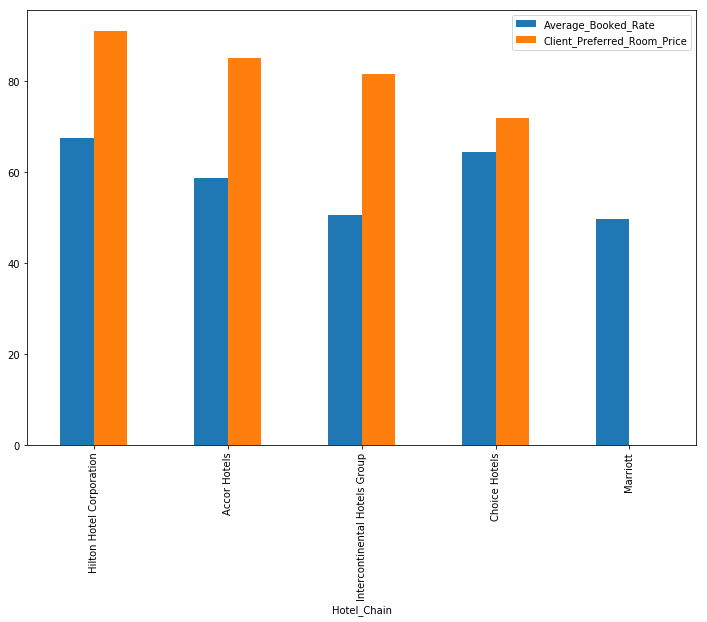

In [60]:
chains = hotels[['Hotel_Chain', 'Annual_Hotel_Spend', 'Average_Booked_Rate', 'Client_Preferred_Room_Price']]
chains_abr = chains.groupby(["Hotel_Chain"]).agg({'Annual_Hotel_Spend':"sum", 'Average_Booked_Rate':'mean'}).reset_index()
chains_pref = chains[chains.Client_Preferred_Room_Price != 0].groupby(["Hotel_Chain"]).agg({'Annual_Hotel_Spend':"sum", 'Client_Preferred_Room_Price':'mean'}).reset_index()

chains_top5_abr = chains_abr[chains_abr.Hotel_Chain != 'No Chain'].sort_values('Annual_Hotel_Spend', ascending=False).head()
chains_top5_abr = chains_top5_abr[["Hotel_Chain", 'Average_Booked_Rate']]

chains_top5_pref = chains_pref[chains_pref.Hotel_Chain != 'No Chain'].sort_values('Annual_Hotel_Spend', ascending=False).head()
chains_top5_pref = chains_top5_pref[["Hotel_Chain", 'Client_Preferred_Room_Price']]

chains_top5 = chains_top5_abr.merge(chains_top5_pref, on="Hotel_Chain", how='left')
chains_top5.plot.bar(figsize=(12,8), x='Hotel_Chain')
